In [ ]:
X_train = []
X_test = []
y_train = []
y_test = []

# **K-Means Clustering**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Kmeans CLustering
from sklearn.cluster import KMeans

# Loading digits dataset
from sklearn.datasets import load_digits

# Selecting k through silhoutte score
from sklearn.metrics import silhouette_score

# Normalization through MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

In [2]:
digits = load_digits()

Important Parameters

* `init`
* `n_init` ( The number of time we would like to run KMeans algorithm )
* `max_iter` ( specifies total number of iterations to perform before declaring the convergence )
* `random_state`

In [5]:
kmeans_kwargs = {
    'init' : 'random',
    'n_init' : 50,
    'max_iter' : 500,
    'random_state' : 0
}

In [6]:
pipeline = Pipeline([
    ('Preprocess', MinMaxScaler()),
    ('Cluster', KMeans(n_clusters = 10, **kmeans_kwargs))
])

pipeline.fit(digits.data)

Pipeline(steps=[('Preprocess', MinMaxScaler()),
                ('Cluster',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

* The cluster centroids can be accessed via `cluster_centers_` member variable of `KMeans` class

In [7]:
cluster_center = pipeline[-1].cluster_centers_

DISPLAY CENTROIDS

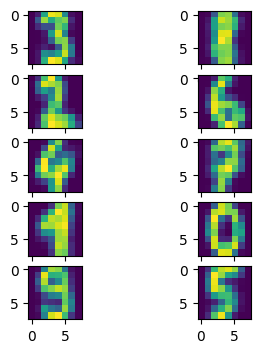

In [8]:
fig, ax = plt.subplots(5,2,figsize = (4,4))
for i,j in zip(ax.flat, cluster_center.reshape(10,8,8)):
  i.imshow(j)

* In the above case the number of clusters were known. Hence we set `k = 10` and got the clusters

* For deciding the optimal number of clusters, we generally use Elbow method and silhouette method

#### **1. Elbow Method**

* Here we keep track of sum of squared error (SSE) in a list for each value of `k`

In [10]:
# Identifying the correct number of clusters

sse_digit = []

scaled_digits = MinMaxScaler().fit_transform(digits.data)

for k in range(1,12):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  sse_digit.append(kmeans.inertia_)

* Note that the SSE for a given clustering output is obtained through `inertia_` member variable

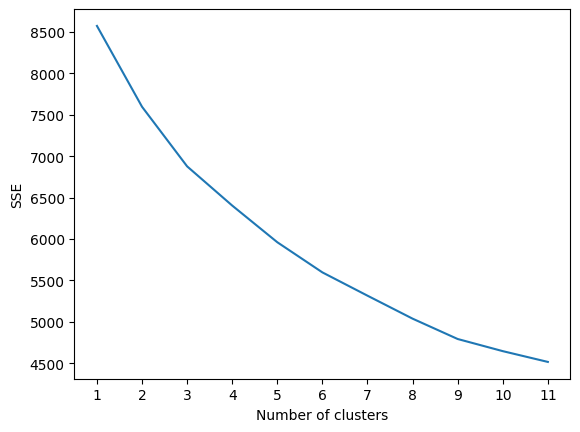

In [11]:
plt.plot(range(1,12), sse_digit)
plt.xticks(range(1,12))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

* There is slight elbow at `k=9`, which could point to the fact that a few digits may have been merged in one cluster

#### **2. Silhouette Method**

In [19]:
sil_coef_digits = []

for k in range(2,15):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_digits)
  score = silhouette_score(digits.data, kmeans.labels_)
  sil_coef_digits.append(score)

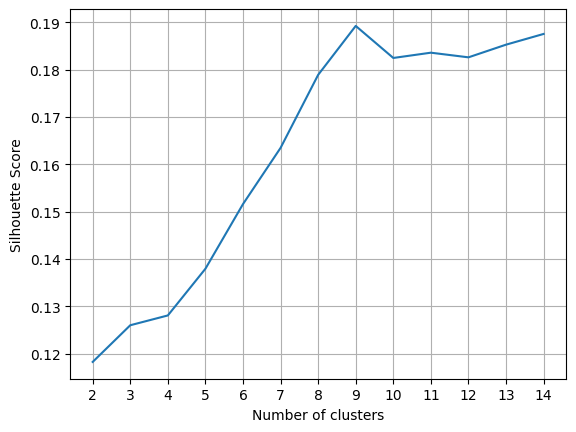

In [20]:
plt.plot(range(2,15), sil_coef_digits)
plt.xticks(range(2,15))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# **HAC**
Hierarchical Agglomerative CLustering

In [21]:
from sklearn.preprocessing import normalize

In [22]:
X = np.array([(8,3), (5,3), (6,4), (1,6), (2,8)])
print(X)

[[8 3]
 [5 3]
 [6 4]
 [1 6]
 [2 8]]


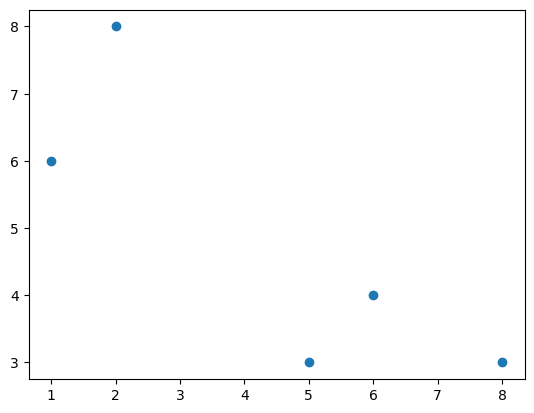

In [23]:
scaled_X = normalize(X)
plt.scatter(X[:,0], X[:,1])
plt.show()

Let's plot dendrogram with `scipy.cluster.hierarchy` library

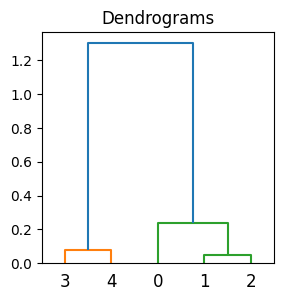

In [26]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (3,3))
plt.title('Dendrograms')
dend = sch.dendrogram(sch.linkage(scaled_X, method = 'ward'))

HAC is implemented in `sklearn.cluster` module as `AgglomerativeClustering` class

# **Neural Networks - Multi Layer Perceptron**

## Multilayer Perceptron (MLP)

* It is a supervised learning algorithm
* MLP learns a non-linear function approximator for either classification or regression deending on the given dataset
* In sklearn, we implement MLP using:
  * `MLPClassifier` for classification
  * `MLPRegressor` for regression

* `MLPClassifier` supports multi-class classification by applying Softmax as the activation in the output layer.
* It also supports multi-label classification in which a sample can belong to more than one classes.

* `MLPRegressor` also supports multi-output regression, in which a sample can have more than one target.

### **MLPClassifier**

##### How to implement MLPClassifier?

* Step-1 Instantiate an MLP classifier estimator

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier()

* Step-2 Call `fit` method on MLP classifier object with training feature matrix and label vector as arguments.

In [ ]:
MLP_clf.fit(X_train, y_train)

* Step-3 After fitting, the model can make predictions for new samples using two methods

In [ ]:
MLP_clf.predict(X_test)  # gives labels for new samples
MLP_clf.predict_proba(X_test)  # gives vector of probability estimates per sample

* MLP Classifier supports only the `Cross-Entropy Loss Function`

##### How to set the number of hidden layers?

* `hidden_layer_sizes` parameter sets the number of layers and the number of neurons in each layer.
* It is a tuple where each element in the tuple represents the number of neurons at the $i^{th}$ position where $i$ is the index of the tuple.
* The length of tuple denotes the total number of hidden layers in the network.

In [ ]:
# To create a 3 hidden layer neural network with 15 neurons in first layer, 10 neurons in second layer and 5 neurons in the third layer

MLPClassifier(hidden_layer_sizes = (15,10,5))

##### How to perform regularization in MLPCLassifier?

* The `alpha` parameter set `l2` penalty regularization parameter
* default value of `alpha = 0.0001`

##### How to set the activation function for the hidden layers?

* `identity`
  * no-op activation
  * returns the parameter itself $f(x) = x$

* `logistic`
  * logistic sigmoid function
  * returns  $f(x)$ = $\frac{1}{(1+ exp(-x))}$

* `tanh`
  * calculates hyperbolic tan function on the parameter
  * returns $ f(x) = tanh (x) $

* `relu`
  * rectified linear unit function
  * returns $ f(x) = max(0,x) $
  * finds max between 0 and the input
  * default
  

##### How to perform weight optimization in MLPClassifier?

* MLPClassifier optimizes the log-loss function using LBFGS or stochastic gradient descent
* `solver` = `['lbfgs', 'sgd', 'adam']`
* `adam` is the default solver
* if the `solver` is 'lbfgs', the classifier will not use minibatch
* Size of minibatches can be set to other stochastic optimizers: `batch_size` (int)
* default `batch_size` is `auto`

In [ ]:
n_samples = 1000

batch_size = min(200, n_samples)

##### How to view weight matrix coefficients of trained MLPClassifier?

* `coefs_`
* It is a list of shape `(n_layers -1, )`
* The $i^{th}$ element in the list represents the weight matrix corresponding to layer $i$

* Example:

  * 'weights between imput and first hidden layer'

    ` print(MLP_clf.coefs_[0])`

  * 'weights between first hidden and second hidden layer'

    `print(MLP_clf.coefs_[1])`

##### How to view bias vector of trained MLPClassifier?

* `intercepts_`
* It is a list of shape `(n_layers -1, )`
* The $i^{th}$ element in the list represents the bias vector corresponding to layer $i + 1$

* Example:

  * 'bias values for first hidden layer'

    ` print(MLP_clf.intercepts_[0])`

  * 'bias values for second hidden layer'

    `print(MLP_clf.intercepts_[1])`

##### Some other parameters in MLPClassifier

* `learning_rate = ['contant', 'invscaling', 'adaptive']` (default = 'constant')
* `learning_rate_init` (float value; default: 0.001)
* `power_t` (float value; default: 0.5)
* `max_iter` (int value; default = 500)

* `learning_rate` and `power_t` are used only for `solver = 'sgd'`

* `learning_rate_init` is used when `solver = 'sgd'` or `adam`

* `shuffle` is used to shuffle samples in each iteration when `solver = 'sgd` or `adam`

* `momentum` is used for gradient descent update when `solver = 'sgd'`

### **MLPRegressor**

* MLPRegressor trains using backpropagation with **no activation function** in the output layer.
* Therefore, it uses the square error as the loss function, and the output is a set of continuous values.
* The parameters of MLPRegressor are the same as that of MLPClassifier

##### How to implement MLPRegressor?

* Step-1 Instantiate an MLP regressor estimator

In [ ]:
from sklearn.neural_network import MLPRegressor
MLP_reg = MLPRegressor()

* Step-2 Call `fit` method on MLP regressor object with training feature matrix and label vector as arguments.

In [ ]:
MLP_reg.fit(X_train, y_train)

* Step-3 After fitting, the model can make predictions for new samples

In [ ]:
MLP_reg.predict(X_test)  # gives labels for new samples

* We can also obtain score by following:

In [ ]:
MLP_reg.score(X_test, y_test)  # return r2 score